# Using the Kalman Filter and Kalman Smoother

This simple example shows how one may apply the Kalman Filter and Kalman
Smoother to some randomly generated data.

The Kalman Filter and Kalman Smoother are two algorithms for predicting the
hidden state of Linear-Gaussian system. In this script, all model parameters
are specified beforehand, so there is no need to fit the Kalman Filter's
parameters to the measurements. However, this is not essential; sensible
defaults will be used for unspecified parameters, and they may be learned using
function`KalmanFilter.em`.

The figure drawn shows the true, hidden state, the state estimates given by the
Kalman Filter, and the state estimates given by the Kalman Smoother.

In [4]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

After importing the necessary Python packages, we will specify the parameters.

In [5]:
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
transition_covariance = np.eye(2)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [5, -5]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

Then, we will instantiate a Kalman Filter and create states and observations.

In [9]:
kf = KalmanFilter(
    transition_matrix,
    observation_matrix,
    transition_covariance,
    observation_covariance,
    transition_offset,
    observation_offset,
    initial_state_mean,
    initial_state_covariance,
    random_state=random_state,
)
states, observations = kf.sample(n_timesteps=50, initial_state=initial_state_mean)

Then, we will estimate the state with filtering and smotting.

In [7]:
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

Finally, we will plot the filtered and smoothed state estimates.

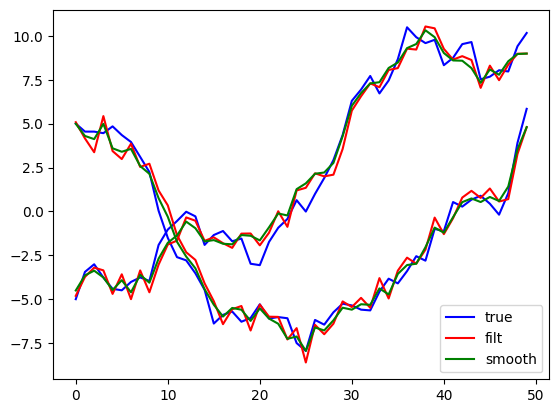

In [8]:
pl.figure()
lines_true = pl.plot(states, color="b")
lines_filt = pl.plot(filtered_state_estimates, color="r")
lines_smooth = pl.plot(smoothed_state_estimates, color="g")
pl.legend(
    (lines_true[0], lines_filt[0], lines_smooth[0]),
    ("true", "filt", "smooth"),
    loc="lower right",
)
pl.show()